In [51]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [52]:
dataset = load_boston()

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [53]:
x = dataset.data
y = dataset.target

In [54]:
feature_names = dataset.feature_names
DESCR = dataset.DESCR

In [55]:
print(DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
class SimpleLinearRegression:
    def __init__(self):
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None

    def _compute_coef(self, x: np.ndarray, y: np.ndarray) -> None:
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sum((x - x_mean)**2)
        self.coef_ = numerator / denominator

    def _compute_intercept(self, x: np.ndarray, y: np.ndarray) -> None:
        x_mean = np.mean(x, axis=0)
        y_mean = np.mean(y, axis=0)
        self.intercept_ = y_mean -self.coef_ * x_mean

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        self._compute_coef(x, y)
        self._compute_intercept(x, y)

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.array([self.coef_ * x[i] + self.intercept_ for i in range(len(x))])
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray):
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred)**2)
        denumerator = np.sum((y - y_mean)**2)
        r2_score = 1.0 - (numerator / denumerator)
        return r2_score

In [57]:
x = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [58]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2: {r2_own}")
print(f"R2: {r2_sklearn}")

Coef: 9.81547485133904
Intercept: -39.3505405807501
R2: 0.3266799609324502
R2: 0.3266799609324502


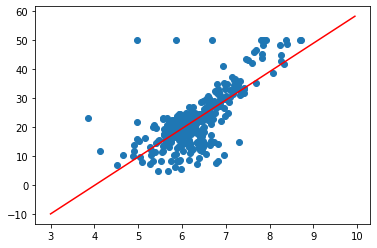

In [59]:
x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
y_arange = regr.predict(x_arange)

plt.scatter(x_train, y_train)
plt.plot(x_arange, y_arange, color='red')
plt.show()